In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
health = pd.read_csv("SYB64_325_202110_Expenditure on health.csv", encoding='latin-1')
health.head()

,Area Code,Area Name,Year,Series,Value,Footnotes,Source
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9,NaN,"World Health Organization (WHO), Geneva, WHO G..."
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6,NaN,"World Health Organization (WHO), Geneva, WHO G..."
2,4,Afghanistan,2016,Current health expenditure (% of GDP),11.0,NaN,"World Health Organization (WHO), Geneva, WHO G..."
3,4,Afghanistan,2017,Current health expenditure (% of GDP),11.8,NaN,"World Health Organization (WHO), Geneva, WHO G..."
4,4,Afghanistan,2018,Current health expenditure (% of GDP),9.4,NaN,"World Health Organization (WHO), Geneva, WHO G..."


In [4]:
def recent(df):
    new_df = ((df.sort_values(by=['Year']).drop_duplicates(subset=['Area Name'], keep='last')).sort_values(by = ['Area Name']))
    new_df = new_df.drop(columns = ['Year'])
    return new_df

def clean(dataset):
    codes = dataset.groupby("Area Code").count().index
    i = 0
    data1 = [pd.DataFrame()] * len(codes)
    curName = ""
    for ind in codes:
        data1[i] = dataset[dataset["Area Code"] == ind]
        curName = data1[i]["Area Name"].reset_index(drop=True)[0]
        data1[i] = data1[i].pivot_table("Value",index="Year",columns="Series",aggfunc='mean')
        data1[i]["Area Code"] = [ind] * len(data1[i])
        data1[i]["Area Name"] = [curName] * len(data1[i])
        data1[i]=data1[i].reset_index()
        i = i+1

    data_final = data1[0]
    for ind in range(len(data1)):
        if(ind!=0):
            data_final = pd.concat([data_final, data1[ind]])
    data_final = data_final.reset_index(drop=True)
    return data_final

In [7]:
data_health = pd.read_csv("SYB64_325_202110_Expenditure on health.csv", encoding='latin-1')
data_growth = pd.read_csv("SYB61_253_Population Growth Rates in Urban areas and Capital cities.csv", encoding = "latin-1")
data_pop = pd.read_csv("SYB64_1_202110_Population, Surface Area and Density.csv", encoding = "latin-1")
data_trade = pd.read_csv("SYB64_123_202110_Total Imports Exports and Balance of Trade.csv", encoding = "latin-1")
data_cpi = pd.read_csv("SYB64_128_202110_Consumer Price Index.csv", encoding = "latin-1")
data_land = pd.read_csv("SYB64_145_202110_Land.csv", encoding = "latin-1")
data_employment = pd.read_csv("SYB64_200_202110_Employment.csv", encoding = "latin-1")
data_gdp = pd.read_csv("SYB64_230_202110_GDP and GDP Per Capita.csv", encoding = "latin-1")
data_mortality = pd.read_csv("SYB64_246_202110_Population Growth, Fertility and Mortality Indicators.csv", encoding = "latin-1")
data_health = pd.read_csv("SYB64_325_202110_Expenditure on health.csv", encoding = "latin-1")
data_death = pd.read_csv("Death Cause Reason by Country.csv", encoding = "latin-1")

health = clean(data_health)
growth = clean(data_growth)
pop = clean(data_pop)
trade = clean(data_trade)
cpi = clean(data_cpi)
land = clean(data_land)
employment = clean(data_employment)
gdp = clean(data_gdp)
mortality = clean(data_mortality)

rec_health = recent(health)
rec_growth = recent(growth)
rec_pop = recent(pop)
rec_trade = recent(trade)
rec_cpi = recent(cpi)
rec_land = recent(land)
rec_employment = recent(employment)
rec_gdp = recent(gdp)
rec_mortality = recent(mortality)

df_merge = [rec_growth, rec_pop, rec_trade, rec_cpi, rec_land, rec_employment, rec_gdp, rec_mortality]
merged = rec_health
for df in df_merge:
    merged = merged.merge(df, how="left", on=['Area Name', 'Area Code'])

merged.head()

C:\Users\jhe80\anaconda3\lib\site-packages\pandas\core\apply.py:507: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  return self._try_aggregate_string_function(obj, f, *self.args, **self.kwargs)


Series,Current health expenditure (% of GDP),Domestic general government health expenditure (% of total government expenditure),Area Code,Area Name,Rural population (percent growth rate per annum),Urban population (percent growth rate per annum),Urban population (percent),Capital city population (as a percentage of total population),Capital city population (as a percentage of total urban population),Capital city population (thousands),...,Employment by industry: Services (%) Female,Employment by industry: Services (%) Male,Employment by industry: Services (%) Male and Female,"Infant mortality for both sexes (per 1,000 live births)",Life expectancy at birth for both sexes (years),Life expectancy at birth for females (years),Life expectancy at birth for males (years),"Maternal mortality ratio (deaths per 100,000 population)",Population annual rate of increase (percent),Total fertility rate (children per women)
0,9.4,1.8,4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,...,10.3,47.1,39.4,51.7,64.3,65.8,62.9,NaN,2.5,4.6
1,5.3,9.7,8,Albania,NaN,NaN,60.3,NaN,NaN,476.0,...,43.8,43.6,43.7,8.0,78.4,80.1,76.7,NaN,-0.1,1.6
2,6.2,10.7,12,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,...,73.2,57.1,59.6,21.2,76.6,77.8,75.4,NaN,2.0,3.1
3,6.7,18.6,20,Andorra,NaN,NaN,88.1,NaN,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,NaN
4,2.5,5.4,24,Angola,NaN,NaN,NaN,NaN,NaN,NaN,...,42.9,40.6,41.7,61.5,60.5,63.4,57.8,NaN,3.3,5.6


In [38]:
combined = pd.merge(merged, data_death, how = "inner", left_on = "Area Name", right_on = "Country Name")
#cpi.head()
data_death.head()
#combined.head()

,Country Name,Covid-19 Deaths,Cardiovascular diseases,Respiratory diseases,Kidney diseases,Neonatal disorders,Meningitis,Malaria,Interpersonal violence,HIV/AIDS,...,Neoplasms,"Fire, heat",Drowning,Drug use disorders,Road injuries,Environmental heat and cold exposure,Self-harm,Conflict and terrorism,Diabetes,Unnamed: 32
0,Afghanistan,2201.0,61995,7082,5637,23701,1563,530,5015,318,...,21247,485,1687,406,8254,59,1613,24295,4817,NaN
1,Albania,1181.0,12904,815,329,161,13,0,57,2,...,4705,18,36,29,243,4,152,0,175,NaN
2,Algeria,2762.0,97931,7528,8201,8756,292,0,459,264,...,23816,782,526,526,11051,40,1515,13,5328,NaN
3,Andorra,84.0,169,39,16,0,0,0,0,3,...,230,0,0,0,8,0,8,0,9,NaN
4,Angola,33.0,25724,3934,2464,18189,2520,10784,974,16802,...,12791,513,793,80,9253,114,1928,16,4033,NaN


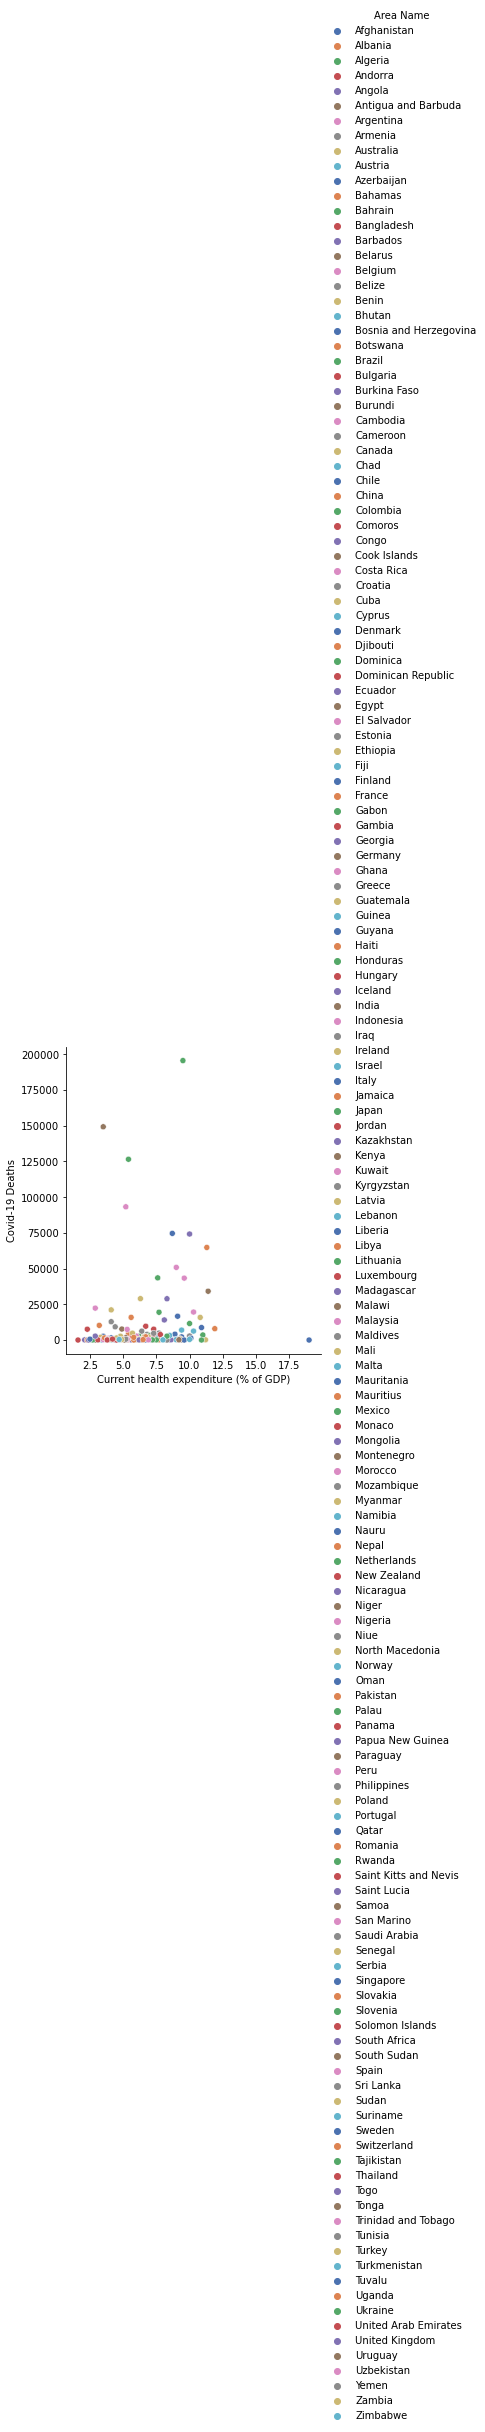

In [50]:

sample25 = combined.sample(25)
sns.relplot(x = "Current health expenditure (% of GDP)", y = "Covid-19 Deaths", data = combined, kind = "scatter", hue = "Area Name", palette = "deep")

By plotting the current health expenditure of a country with its deaths due to COVID-19, we can see a slight negative correlation between these two variables for countries that have a significant number of COVID-19 deaths (5000+). However, there are also many of countries without a significant number of COVID-19, so this slight negative correlation may change as we further investigate the relationship between health expenditure and COVID-19 deaths in countries with fewer than 5000 COVID-19 deaths. 

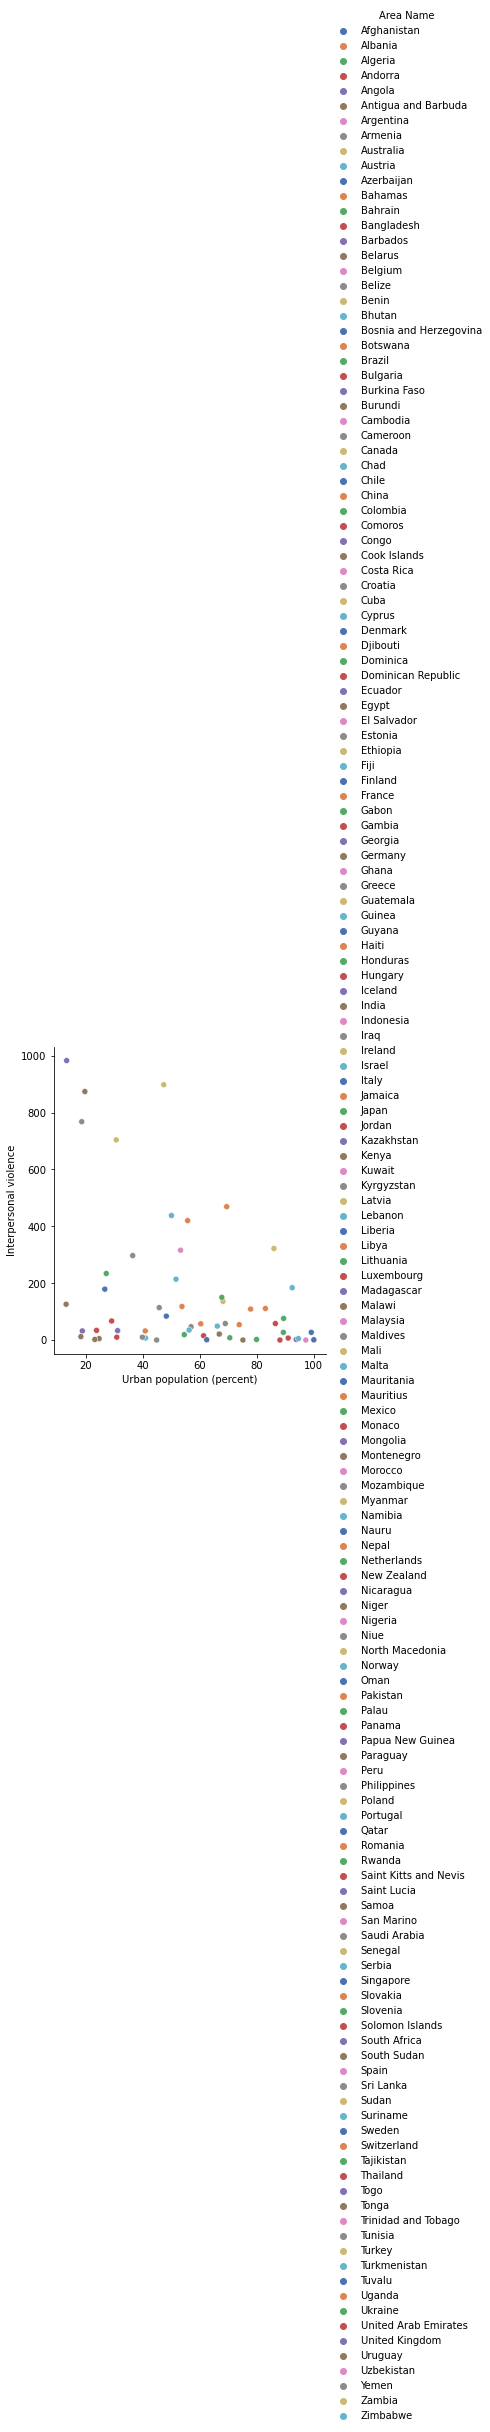

In [31]:
sns.relplot(x = "Urban population (percent)", y = "Interpersonal violence", data = combined, kind = "scatter", hue = "Area Name", palette = "deep")

By plotting the urban population of a country with its deaths due to interpersonal violence we can see that there appears to be very little correlation between these variables. 

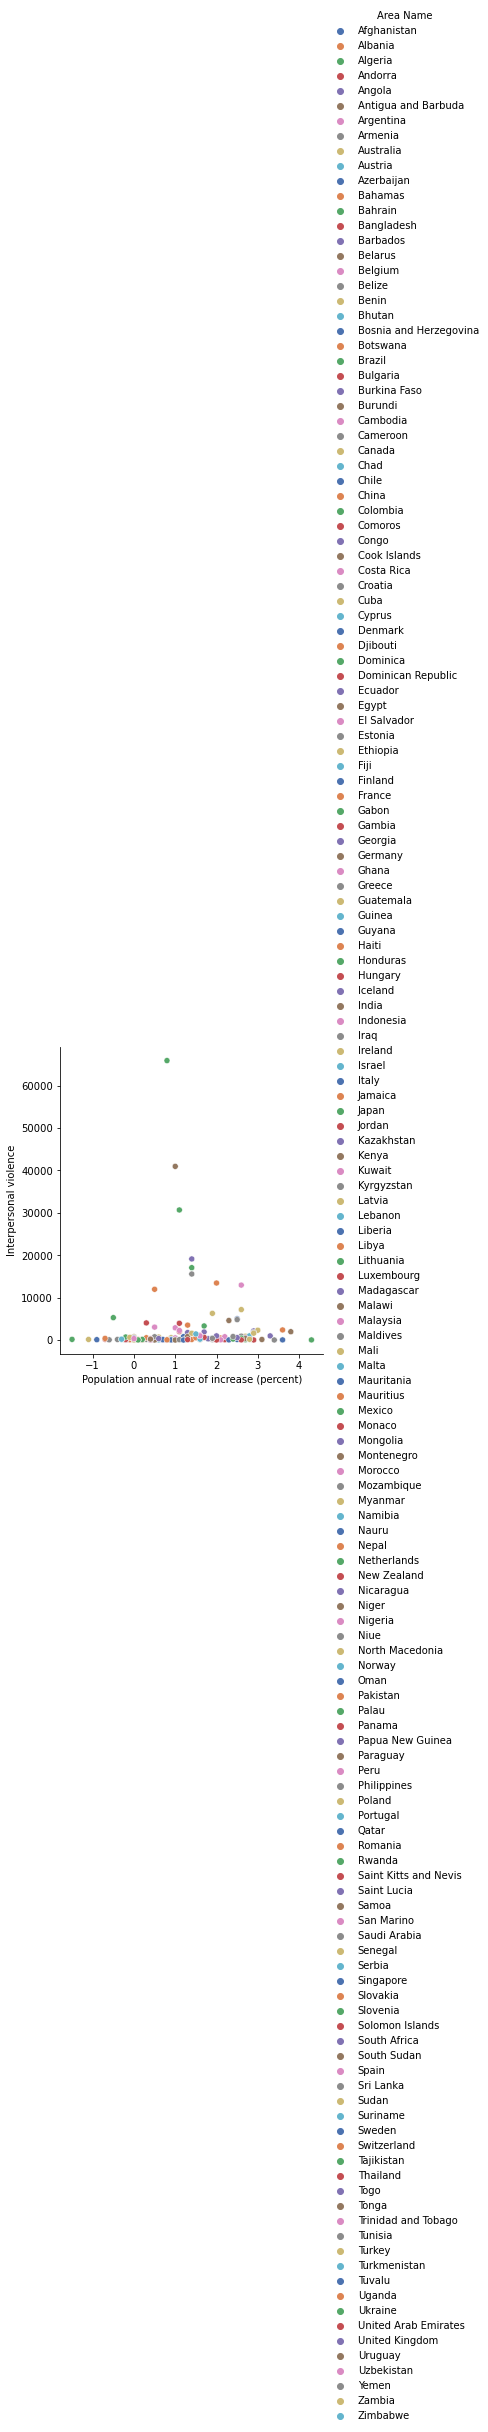

In [44]:
sns.relplot(x = "Population annual rate of increase (percent)", y = "Interpersonal violence", data = combined, kind = "scatter", hue = "Area Name", palette = "deep")

By plotting the population annual rate of increase of a country with its deaths due to interpersonal violence we can see that there appears to be very little correlation between these variables. 

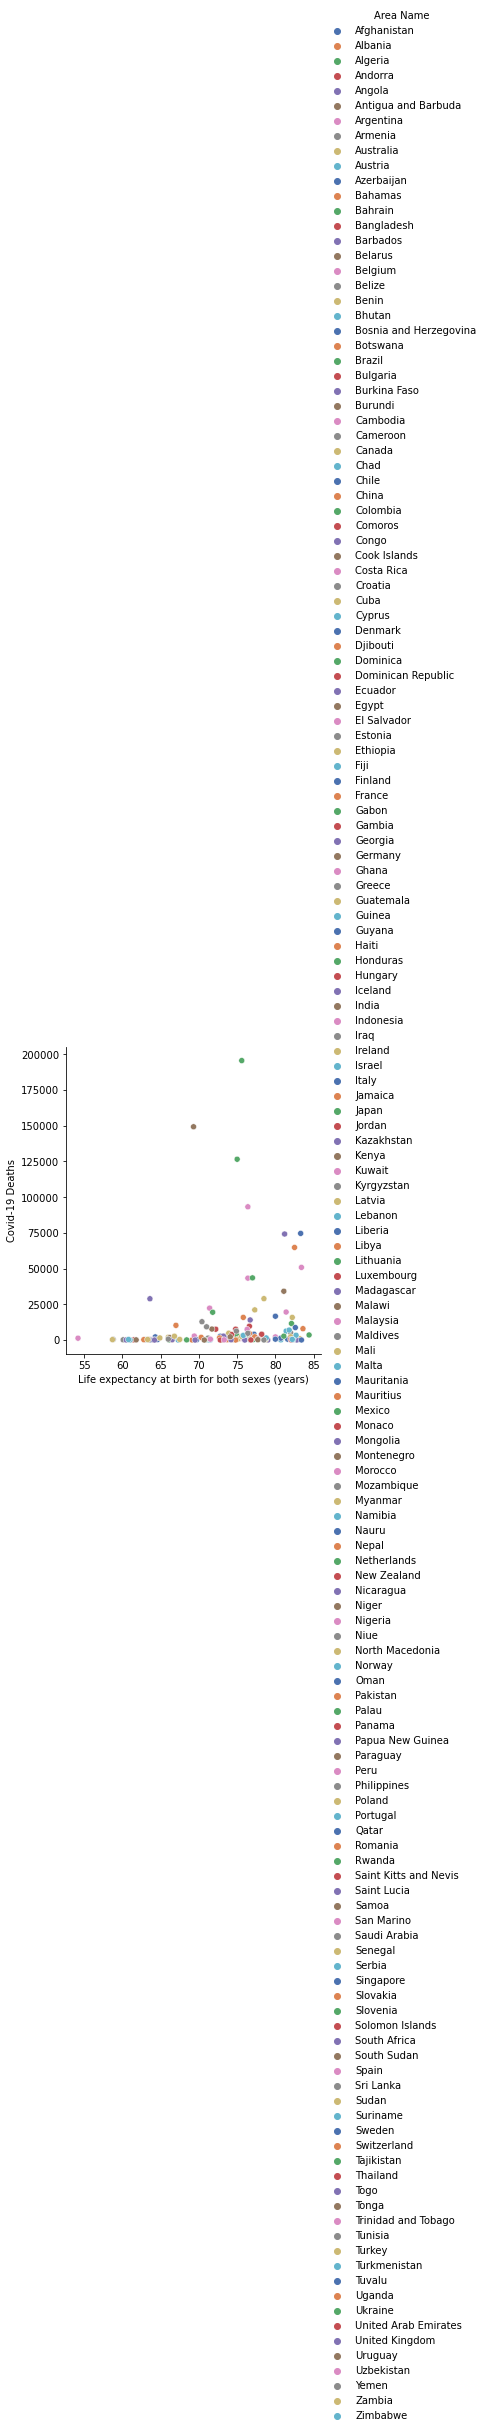

In [46]:
sns.relplot(x = "Life expectancy at birth for both sexes (years)", y = "Covid-19 Deaths", data = combined, kind = "scatter", hue = "Area Name", palette = "deep")

By plotting a country's life expectancy at birth for both sexes with its deaths due to COVID-19, we can see that there appears to be a slight positive correlation between these variables for countries that have a significant number of COVID-19 deaths (5000+). However, there are also many of countries without a significant number of COVID-19, so this slight positive correlation may change as we further investigate the relationship between life expectancy at birth for both sexes and COVID-19 deaths in countries with fewer than 5000 COVID-19 deaths. 

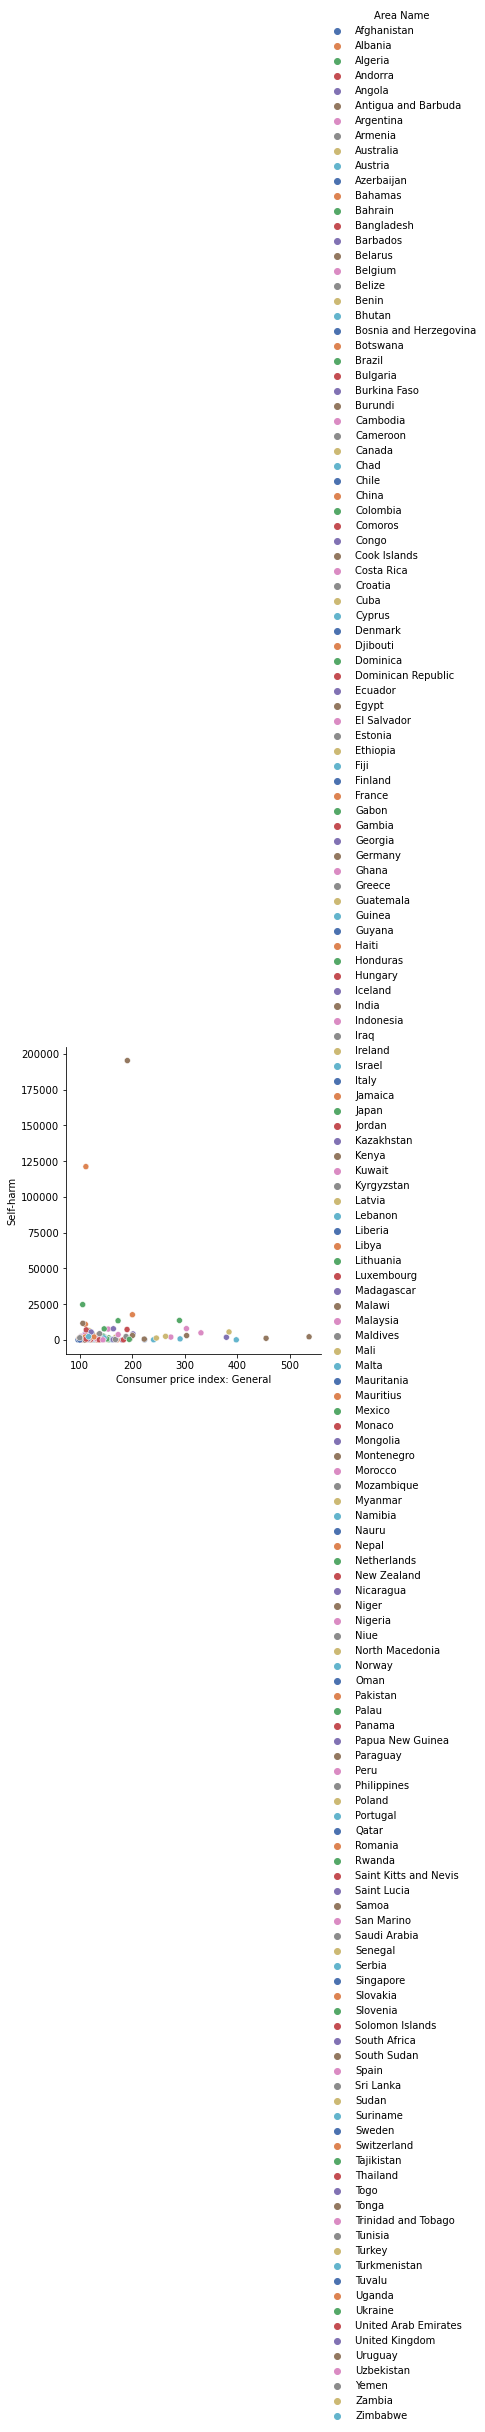

In [49]:
sns.relplot(x = "Consumer price index: General", y = "Self-harm", data = combined, kind = "scatter", hue = "Area Name", palette = "deep")

By plotting the general consumer price index of a country with its deaths due to self-harm, we can see that there appears to be very little correlation between the variables.